Python 信号生成与预处理


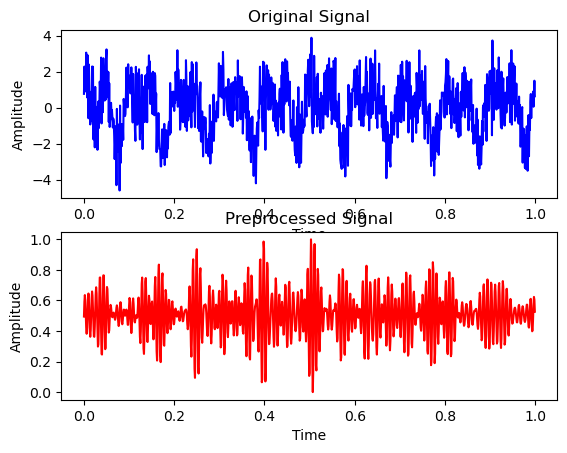

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

# Generate signal xn
Fs = 1000
t = np.arange(0, 1, 1/Fs)
x = np.sin(2*np.pi*10*t) + np.cos(2*np.pi*20*t)
xn = x + np.random.randn(len(t))

# Filter parameters
lowcut = 100
highcut = 150
order = 6

# Butterworth bandpass filter
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyquist = 0.5 * fs
    low = lowcut / nyquist
    high = highcut / nyquist
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

# Apply bandpass filter
xn_filtered = butter_bandpass_filter(xn, lowcut, highcut, Fs, order)

# Normalize
xn_normalized = (xn_filtered - np.min(xn_filtered)) / (np.max(xn_filtered) - np.min(xn_filtered))

# Display results
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(t, xn, 'b') # Original signal
plt.title('Original Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.subplot(2, 1, 2)
plt.plot(t, xn_normalized, 'r') # Preprocessed signal
plt.title('Preprocessed Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()


通过GPT数字和模拟滤波器
我个人负责两个函数：signalTimefeatureExtractor和zerocrossrate
`signalTimefeatureExtractor.signal_time_feature_extractor(xn)` 是一个用来提取信号时间特征的函数。在数字信号处理和相关领域中，信号时间特征提取是对信号进行分析和描述的一种常见方法。通过提取信号的时间特征，可以了解信号在时间域上的一些重要性质，比如它的趋势、振幅、频率等等。
具体来说，这个函数可能会计算一些基本的时间特征，比如：

1. 均值（Mean）：信号的平均值，反映了信号的整体水平。
2. 标准差（Standard Deviation）：信号数值的离散程度，即信号值在平均值周围的分散程度。
3. 过零率（Zero Crossing Rate）：信号穿过水平线零点的频率，用于衡量信号的变化速度。

通过这些特征，可以对信号的基本特性有一个大致的了解，比如信号的波动情况、变化频率等。这对于许多应用来说都是非常有用的，比如音频处理、振动分析、语音识别等等。

zerrocrossrate
Python 中的函数 Zerocrossrate.zero_cross_rate(xn) 是计算由 xn 表示的值序列的过零率。 此函数通常用于信号处理和音频分析中，以测量信号改变极性（即穿过零水平轴）的频率。
代码如下

In [ ]:
import numpy as np
import signalTimefeatureExtractor
import zerocrossrate

# Creating the input signal
Fs = 1000
t = np.arange(0, 1, 1/Fs)
x = np.sin(2*np.pi*10*t) + np.cos(2*np.pi*20*t)

# Digital simulation and filtering
xn = x + np.random.randn(len(t))  # Adding Random Noise

# Using the signal_time_feature_extractor function to process the signal
features = signalTimefeatureExtractor.signal_time_feature_extractor(xn)
print('Features in the time domain:')
print(features)

# Using the zero cross rate function to calculate the zero crossing rate of the signal
zcr = zerocrossrate.zero_cross_rate(xn)
print('Zero crossing rate:')
print(zcr)


函数结果如下
PS C:\Users\GOMES SA SIVARINA\Desktop\51TPC> & "D:/User/Sivarina Gomes Sa/anaconda3/python.exe" "c:/Users/GOMES SA SIVARINA/Desktop/51TPC/segunda_tentativa.py"
Features in the time domain:
{'mean': 0.023139126759058073 平均值, 'std': 1.429997969873731 标准偏差}
Zero crossing rate:
0.334 过零率
PS C:\Users\GOMES SA SIVARINA\Desktop\51TPC>


call函数
首先将调用函数保存在另一个扩展名为.py的文件中，并将主要代码保存在同一路径中
如下代码

 call SignalTimeFeatureExtractor 

In [ ]:
import numpy as np

def signal_time_feature_extractor(signal):
    mean_value = np.mean(signal)  # Média do sinal
    std_value = np.std(signal)     # Desvio padrão do sinal
    # Retornando as características extraídas
    return {'mean': mean_value, 'std': std_value}

call zerrocrossrate

In [ ]:
import numpy as np

def zero_cross_rate(x):
    zero_crossings = np.where(np.diff(np.sign(x)))[0]  # Encontrando os pontos de cruzamento por zero
    zcr = len(zero_crossings) / len(x)                 # Calculando a taxa de cruzamento por zero
    return zcr